# HR Analytics with Python & Pandas

#1. Project Introduction
>**purpose:**
Analyze HR data to identify key trends in employee attrition, satisfaction, salary distribution, and develop KPIs to support data-driven HR strategies .

>**About Dataset** :
HR analytics, also referred to as workforce analytics, or talent analytics, involves gathering together, analyzing,
and reporting HR data. It is the collection and application of talent data to improve critical talent and business outcomes. It enables your organization to measure the impact of a range of HR metrics on overall business performance and make decisions based on data. They are primarily responsible for interpreting and analyzing vast datasets.







# 2. Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**3. Load the Dataset**

In [ ]:
df = pd.read_csv("/content/HR_Analytics.csv")
df.head(5)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


**4. Data Understanding & Cleaning**

1. Check for missing values, duplicates, and data types.
2. Handle missing values if any.







In [ ]:
#df.info()  (since no missing value found)
df.isnull().sum()

,0
EmpID,0
Age,0
AgeGroup,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0


# KPIs

In [ ]:
num_of_employees = df.shape[0]
print(f"Number of employees: {num_of_employees}")

attrition_count = df[df['Attrition']=="Yes"].shape[0]
print("Number of employees who left:",attrition_count)

attrition_rate = (attrition_count/num_of_employees)*100
print(f"Attrition rate: {attrition_rate:.2f}","%")

avg_age = (df["Age"].mean().round(2))
print("Average age of employees:",avg_age)

avg_salary = round(float(df['MonthlyIncome'].mean()),2)
print("Average monthly income:",avg_salary)

avg_tenure = round(float(df['YearsAtCompany'].mean()),2)
print("Average years at company:",avg_tenure)

avg_satisfaction = round(float(df['JobSatisfaction'].mean()),2)
print("Average job satisfaction score:",avg_satisfaction)

Number of employees: 1480
Number of employees who left: 238
Attrition rate: 16.08 %
Average age of employees: 36.92
Average monthly income: 6504.99
Average years at company: 7.01
Average job satisfaction score: 2.73


KPIs table

In [ ]:
KPIs = {
     "No. of employees" : [num_of_employees],
    "Attrition Count" : [attrition_count],
    "Attrition Rate" : [attrition_rate],
    "Avg. Age" : [avg_age],
    "Avg. Salary" : [avg_salary],
    "Avg. Tenure" : [avg_tenure],
    "Avg. Satisfaction" : [avg_satisfaction]
}
df_KPIs = pd.DataFrame(KPIs)
df_KPIs


,No. of employees,Attrition Count,Attrition Rate,Avg. Age,Avg. Salary,Avg. Tenure,Avg. Satisfaction
0,1480,238,16.081081,36.92,6504.99,7.01,2.73


# 6. Exploratory Data Analysis (EDA)

Answer HR questions:

1. Which departments have the highest attrition?

2. Does income level affect attrition?

3. How does job role relate to attrition?

In [ ]:
attr_by_dept = df.groupby(['Department', 'Attrition'])['Attrition'].count().reset_index(name='Count')
attr_by_dept

,Department,Attrition,Count
0,Human Resources,No,51
1,Human Resources,Yes,12
2,Research & Development,No,834
3,Research & Development,Yes,133
4,Sales,No,357
5,Sales,Yes,93


Q.1 Which departments have the highest attrition?

In [ ]:
#Which departments have the highest attrition?
attr_by_dept_yes = attr_by_dept[attr_by_dept['Attrition'] == 'Yes']
highest_attr_by_dept = attr_by_dept_yes.sort_values(by='Count', ascending=False).iloc[0]


print(f"The department with the highest attrition is: {highest_attr_by_dept['Department']} with {highest_attr_by_dept['Count']} employees leaving.")

The department with the highest attrition is: Research & Development with 133 employees leaving.


**Attrition Count by Department**

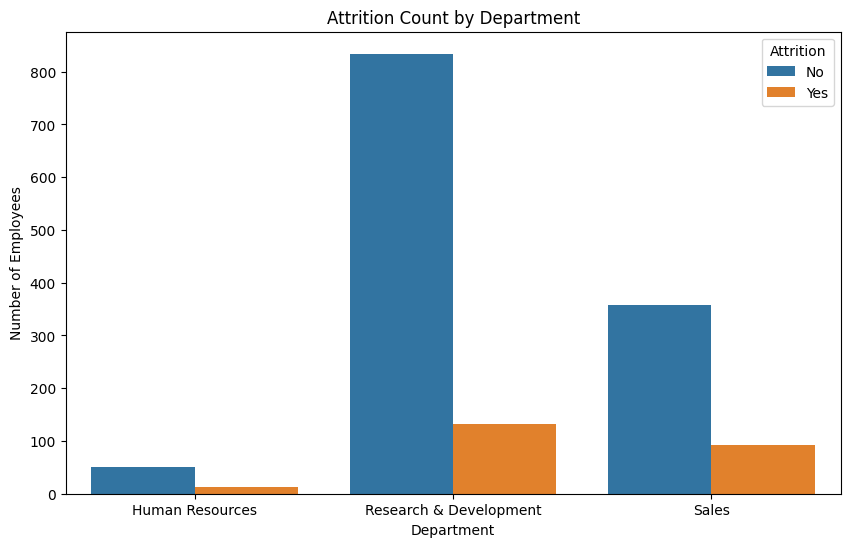

In [ ]:
# Visualize attrition count by department using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Count', hue='Attrition', data=attr_by_dept)
plt.title('Attrition Count by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

In [ ]:
df.set_index("EducationField")["Attrition"]
# df is the DataFrame which have columns EducationField and attiration


,Attrition
EducationField,
Life Sciences,Yes
Medical,No
Marketing,Yes
Life Sciences,No
Medical,Yes
...,...
Life Sciences,No
Marketing,No
Marketing,No


In [ ]:
# Group data by EducationField and Attrition to get counts
attrition_by_education = df.groupby(['EducationField', 'Attrition'])['Attrition'].count().reset_index(name='Count')
attrition_by_education



,EducationField,Attrition,Count
0,Human Resources,No,20
1,Human Resources,Yes,7
2,Life Sciences,No,518
3,Life Sciences,Yes,89
4,Marketing,No,125
5,Marketing,Yes,36
6,Medical,No,407
7,Medical,Yes,63
8,Other,No,72
9,Other,Yes,11


In [ ]:
# Create a list of EducationFields
education_fields = attrition_by_education['EducationField'].unique()

education_fields

array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [ ]:
# Create a list to store attrition counts for each EducationField
attrition_counts = []
# Iterate through EducationFields and calculate attrition counts for 'Yes'
for field in education_fields:
    attrition_count = attrition_by_education[(attrition_by_education['EducationField'] == field) & (attrition_by_education['Attrition'] == 'Yes')]['Count'].values[0]
    attrition_counts.append(attrition_count)


In [ ]:
# Display the attrition_counts list
print(attrition_counts)

[np.int64(7), np.int64(89), np.int64(36), np.int64(63), np.int64(11), np.int64(32)]


**Attrition Count by Education Field**

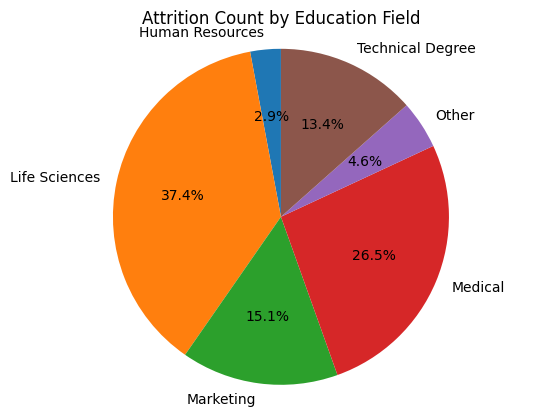

In [ ]:
# Create a list to store attrition counts for each EducationField
attrition_counts = []

# Iterate through EducationFields and calculate attrition counts for 'Yes'
for field in education_fields:
    attrition_count = attrition_by_education[(attrition_by_education['EducationField'] == field) & (attrition_by_education['Attrition'] == 'Yes')]['Count'].values[0]
    attrition_counts.append(attrition_count)



# Create the pie chart using matplotlib
plt.pie(attrition_counts, labels=education_fields, autopct='%1.1f%%', startangle=90)
plt.title('Attrition Count by Education Field')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Attrition Rate by Education Field**

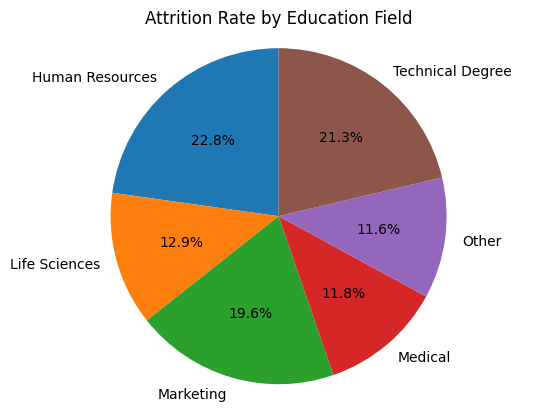

In [ ]:
# Calculate the total number of employees in each education field
total_by_education = df.groupby('EducationField')['EducationField'].count().reset_index(name='Total')

# Merge attrition counts with total counts
attrition_rate_by_education = pd.merge(attrition_by_education, total_by_education, on='EducationField')

# Calculate attrition rate
attrition_rate_by_education['AttritionRate'] = (attrition_rate_by_education['Count'] / attrition_rate_by_education['Total']) * 100

# Filter for only "Yes" attrition
attrition_rate_yes = attrition_rate_by_education[attrition_rate_by_education['Attrition'] == 'Yes']

# Create the pie chart using matplotlib based on AttritionRate
plt.pie(attrition_rate_yes['AttritionRate'], labels=attrition_rate_yes['EducationField'], autopct='%1.1f%%', startangle=90)
plt.title('Attrition Rate by Education Field')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Attrition by Gender**

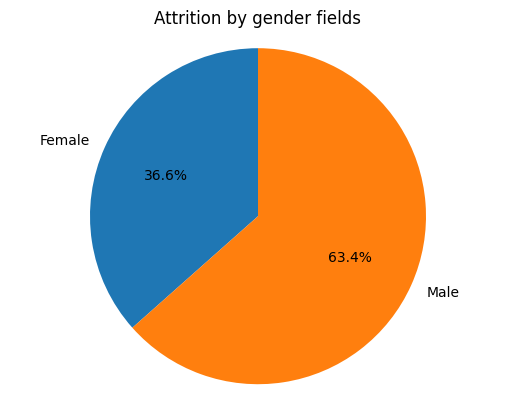

In [ ]:
# Group data by gender and Attrition to get counts
attrition_by_gender = df.groupby(['Gender', 'Attrition'])['Attrition'].count().reset_index(name='Count')

# Filter for only "Yes" attrition
attrition_by_genderyes = attrition_by_gender[attrition_by_gender['Attrition'] == 'Yes']

# Create a list of gender for labels (from the filtered data)
gender_labels = attrition_by_genderyes['Gender'].tolist()

# Create a list to store attrition counts for each gender (from the filtered data)
attrition_counts = attrition_by_genderyes['Count'].tolist()

# Create the pie chart using matplotlib
plt.pie(attrition_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90)
plt.title('Attrition by gender fields')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
attrition_by_gender = df.groupby(['Gender', 'Attrition'])['Attrition'].count().reset_index(name='Count')
attrition_by_gender


,Gender,Attrition,Count
0,Female,No,504
1,Female,Yes,87
2,Male,No,738
3,Male,Yes,151


**Attrition by Marital Status**

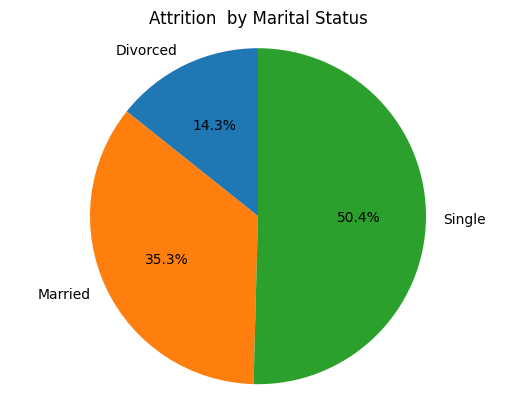

In [ ]:
# Group data by MaritalStatus and Attrition to get counts
attrition_by_marital = df.groupby(['MaritalStatus', 'Attrition'])['Attrition'].count().reset_index(name='Count')

# Filter for only "Yes" attrition
attrition_by_marital_yes = attrition_by_marital[attrition_by_marital['Attrition'] == 'Yes']

# Create a list of MaritalStatus fields from the filtered data
MaritalStatus_fields = attrition_by_marital_yes['MaritalStatus'].tolist()

# Create a list to store attrition counts for each MaritalStatus from the filtered data
attrition_counts = attrition_by_marital_yes['Count'].tolist()

# Create the pie chart using matplotlib
plt.pie(attrition_counts, labels=MaritalStatus_fields, autopct='%1.1f%%', startangle=90)
plt.title('Attrition by Marital Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Attrition Count and Rate by Age Group**

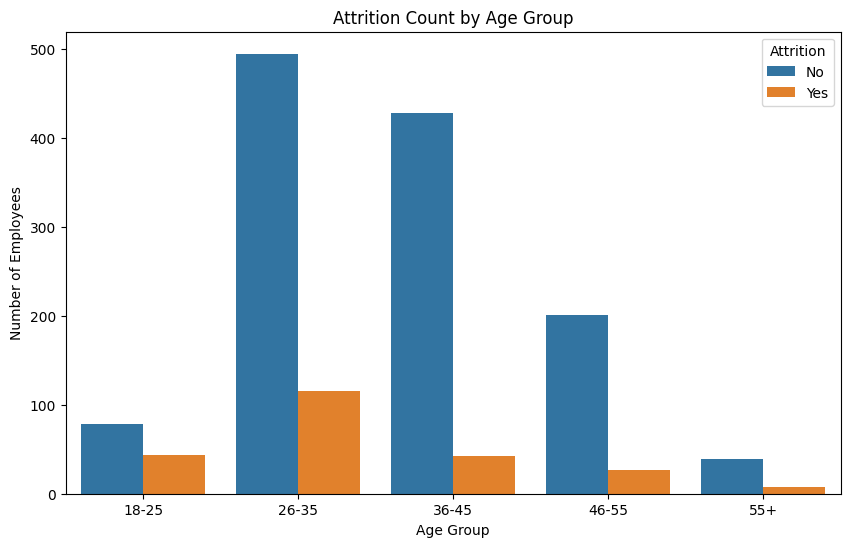

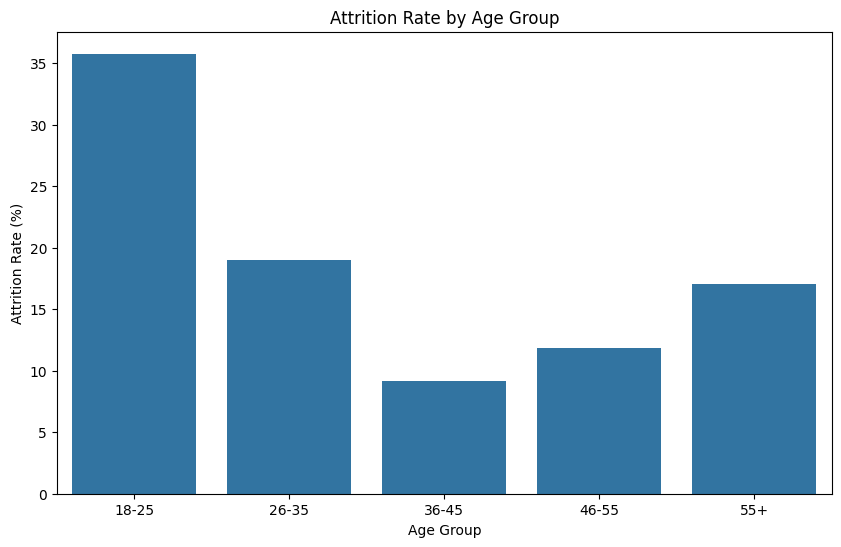

In [ ]:
# Calculate attrition count by AgeGroup
attrition_by_agegroup = df.groupby(['AgeGroup', 'Attrition'])['Attrition'].count().reset_index(name='Count')

# Calculate total employees by AgeGroup
total_by_agegroup = df.groupby('AgeGroup')['AgeGroup'].count().reset_index(name='Total')

# Merge attrition counts with total counts
attrition_rate_by_agegroup = pd.merge(attrition_by_agegroup, total_by_agegroup, on='AgeGroup')

# Calculate attrition rate
attrition_rate_by_agegroup['AttritionRate'] = (attrition_rate_by_agegroup['Count'] / attrition_rate_by_agegroup['Total']) * 100

# Visualize Attrition Count by AgeGroup
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Count', hue='Attrition', data=attrition_by_agegroup)
plt.title('Attrition Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

# Visualize Attrition Rate by AgeGroup (only show attrition 'Yes')
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='AttritionRate', data=attrition_rate_by_agegroup[attrition_rate_by_agegroup['Attrition'] == 'Yes'])
plt.title('Attrition Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate (%)')
plt.show()

**Attrition Count by Years at Company**

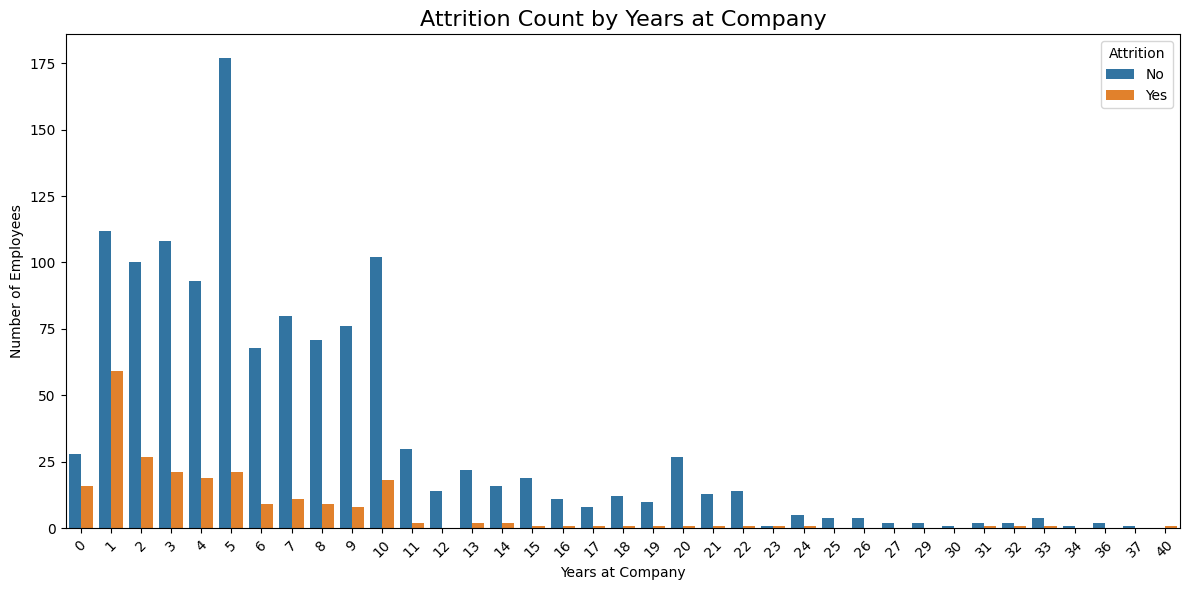

In [ ]:
# Calculate attrition count by YearsAtCompany
attrition_by_tenure = df.groupby(['YearsAtCompany', 'Attrition'])['Attrition'].count().reset_index(name='Count')

# Visualize Attrition Count by YearsAtCompany
plt.figure(figsize=(12, 6))
sns.barplot(x='YearsAtCompany', y='Count', hue='Attrition', data=attrition_by_tenure)
plt.title('Attrition Count by Years at Company',fontsize=16)
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability if there are many years
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()



**Monthly Income Distribution by Attrition**

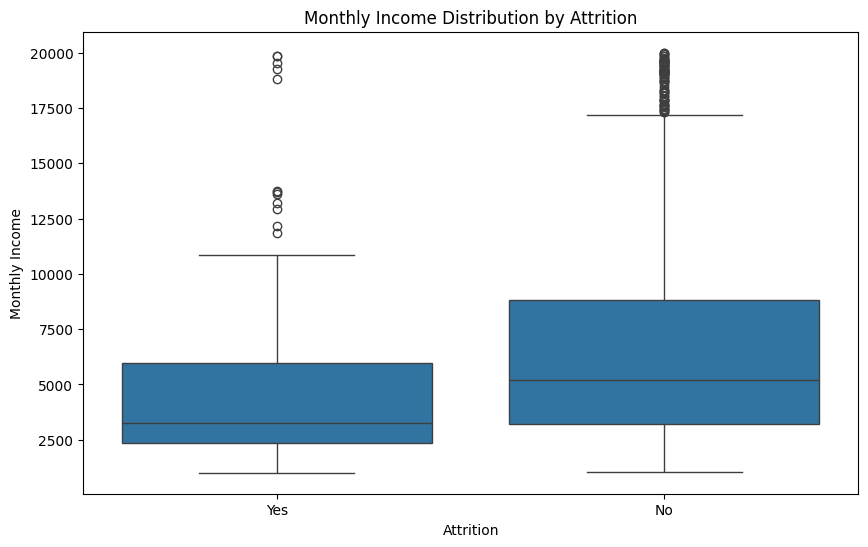

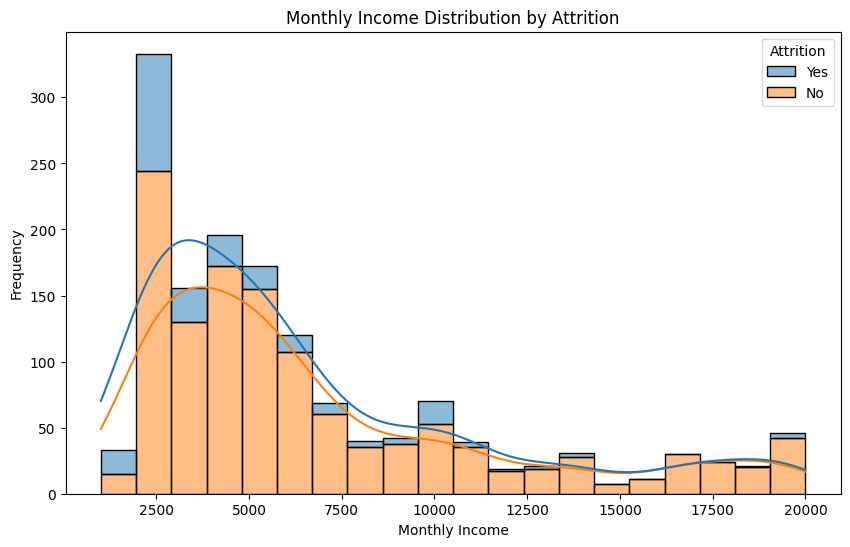

In [ ]:
# Visualize MonthlyIncome distribution by Attrition using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

# Visualize MonthlyIncome distribution by Attrition using histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', multiple='stack', kde=True)
plt.title('Monthly Income Distribution by Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

##7. Key Insights and interpretation  from EDA:

Based on the analysis, key factors associated with higher attrition include:

*   **Overall Attrition Rate:** 16.08%
*   **Departments:** High attrition count in Research & Development and Sales.
*   **Age:** Highest attrition rate in the 18-25 age group.
*   **Tenure:** Higher attrition among employees with 0-3 years at the company.
*   **Income:** Lower monthly income brackets show higher attrition.
*   **Marital Status:** Single employees have the highest attrition count among leavers.
*   **Education Field:** Higher attrition rates in Human Resources and Technical Degree fields.
*   **Gender:** Higher attrition count among male employees.

These insights pinpoint areas for focused HR strategies to reduce attrition.

# 8. Recommendations

Based on the key insights from the analysis, here are recommendations to reduce attrition:

*   **Target Early Tenure and Young Employees:**
    *   Strengthen onboarding and mentorship programs.
    *   Focus on career development paths for junior staff.
    *   Gather and act on feedback from employees in their first 1-3 years.

*   **Evaluate Compensation and Benefits:**
    *   Review and potentially adjust salaries, especially in lower income brackets.
    *   Explore competitive benefits tailored to diverse needs (including single employees).

*   **Investigate Department-Specific Issues:**
    *   Conduct deeper analysis in R&D and Sales departments.
    *   Assess job satisfaction and workload in high-attrition education fields (HR, Technical Degree).

*   **Improve Job Satisfaction and Engagement:**
    *   Implement initiatives to boost job satisfaction, particularly at lower reported levels.
    *   Promote work-life balance and growth opportunities.

By implementing these targeted actions, the company can address key drivers of attrition.

# 9. Conclusion

This HR analytics project analyzed employee data to understand the key drivers of attrition. The analysis revealed that factors such as age (**younger employee**s), **tenure**(early years at the company), **income level** (lower brackets), **marital status** (single), **certain education fields** (Human Resources, Technical Degree), and *departments* (Research & Development, Sales) are significantly associated with higher attrition. By focusing on the recommendations derived from these insights, the company can implement targeted strategies to improve employee retention and create a more supportive work environment.